In [ ]:
#FOREX PREDICTION DATA ANALYSIS
#OBJECTIVES
#1. Load the dataset
#2. inspect the dataset for empty values, wrong data types, wrontly formatted data
#3. Analyze the dataset for trends, seasonality, and other patterns
#4. visualize the data to understand the trends and patterns
#5. evaluate the performance of the model using appropriate metrics
#6. identify patterns and correlations in Euro or USD for the exchange rates
#7. predict the future exchange rates using machine learning models
#8. save the model for future use

In [ ]:
#import the necessary libraries
#could first looka at the data to see what libraries are needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#load the dataset
df = pd.read_csv('forex_predictions_data.csv')



In [6]:
#describe the dataset
print(df.describe())

             Open        High         Low       Close  Predicted_Close  \
count  224.000000  220.000000  225.000000  212.000000       222.000000   
mean     1.239946    1.753113    0.750030    1.245072         1.250415   
std      0.148956    0.147816    0.150434    0.140594         0.156102   
min      1.002530    1.505420    0.505680    1.002320         1.000120   
25%      1.111860    1.638832    0.614320    1.122535         1.115280   
50%      1.248105    1.763400    0.746310    1.235910         1.259605   
75%      1.365100    1.877682    0.877570    1.368805         1.392158   
max      1.493440    1.995250    0.999860    1.498440         1.499680   

       Confidence  
count  218.000000  
mean     0.756468  
std      0.135125  
min      0.500000  
25%      0.652500  
50%      0.760000  
75%      0.870000  
max      1.000000  


In [7]:
#get the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (229, 10)


In [8]:
#handling bad data: empty values, wrong data types, wrongly formatted data
#check for empty values
print("Checking for empty values:")
print(df.isnull().sum())

Checking for empty values:
Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64


In [10]:
#handle missing values
print("Missing values in each column:")
#for numeric columns, fill with mean but not average

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Confidence','Predicted_Close']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #convert to numeric, coerce errors to NaN
        # Fill NaN values with the mean of the column using the inplace parameter
        df[col] = df[col].fillna(df[col].median())
        
        
#for categorical columns, fill with mode
categorical_cols = [ 'Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill NaN values with the mode of the column
#better usse mean median or mode

#check for missing values again
print("Missing values after handling:")
print(df.isnull().sum())


Missing values in each column:
Missing values after handling:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [ ]:
# conveert non numeric columns to numeric
#convert date column to datetime format

In [ ]:
#data in wrong format
#this is common for date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, coerce errors to NaT
#handle volume columnsa with error values
#first convert to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#fill NaN values in Volume with median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())  # Fill NaN values with the median of the column
#clean the confidence column
df['Confidence'] = pd.to_numeric(df['Confidence'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#fill NaN values in Confidence with median
df['Confidence'] = df['Confidence'].fillna(df['Confidence'].median())  # Fill NaN values with the median of the column


#check the dates again
print("Checking the date column after conversion:")
print(df['Date'].head())




Checking the date column after conversion:
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: Date, dtype: datetime64[ns]


In [13]:

#check for missing values again
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [15]:
#wrong data types
price_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Confidence', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
        #remove the extreme outliers( beyond 3 standard deviations)
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = df[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan)
        # Fill NaN values with the median of the column
        df[col] = df[col].fillna(df[col].median())
#check the data types of the columns
print("Data types of the columns:")
print(df.dtypes)


Data types of the columns:
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Predicted_Close           float64
Currency_Pair              object
Signal                     object
Confidence                float64
dtype: object


In [ ]:
#duplicates
#check for duplicates
print("number of duplicates in the dataset:", df.duplicated().sum())


number of duplicates in the dataset: 10


In [17]:
#removing the duplicates
df = df.drop_duplicates()
print("Number of duplicates after removing:", df.duplicated().sum())

#check for duplicate dates
print("Checking for duplicate dates:")
duplicate_dates = df.drop_duplicates(subset='Date', keep='first')   

#shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicates:", df.shape)

Number of duplicates after removing: 0
Checking for duplicate dates:
Shape of the dataset after removing duplicates: (219, 10)


In [18]:
#final clean dataset
print("Final cleaned dataset:")
df.info()
#check for empty values again
print("Checking for empty values after cleaning:")
print(df.isnull().sum())

Final cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             216 non-null    datetime64[ns]
 1   Open             219 non-null    float64       
 2   High             219 non-null    float64       
 3   Low              219 non-null    float64       
 4   Close            219 non-null    float64       
 5   Volume           219 non-null    float64       
 6   Predicted_Close  219 non-null    float64       
 7   Currency_Pair    219 non-null    object        
 8   Signal           219 non-null    object        
 9   Confidence       219 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.8+ KB
Checking for empty values after cleaning:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
P

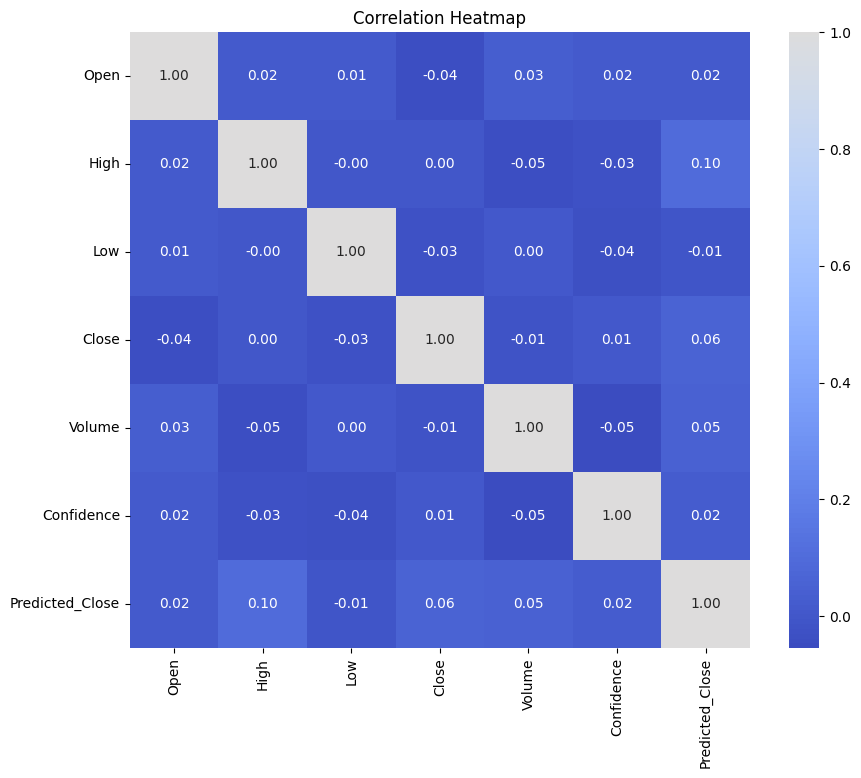

In [20]:
#analysis of the dataset
#correlation analysis
#calculate the correlation matrix
corr_matirx = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Confidence', 'Predicted_Close']].corr()

#plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matirx, annot=True, cmap='coolwarm', fmt='.2f', center=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#